In [1]:
import pandas as pd
import quandl

In [2]:
quandl.ApiConfig.api_key = "n4qQPMxtozM5Ts6iqy4w"

In [3]:
start_date=pd.to_datetime("2013-01-01")
end_date=pd.to_datetime("2018-01-01")

In [4]:
aapl_stk=quandl.get("WIKI/AAPL.11",start_date=start_date,end_date=end_date)
cisco_stk=quandl.get("WIKI/CSCO.11",start_date=start_date,end_date=end_date)
ibm_stk=quandl.get("WIKI/IBM.11",start_date=start_date,end_date=end_date)
amzn_stk=quandl.get("WIKI/AMZN.11",start_date=start_date,end_date=end_date)

In [5]:
aapl_stk.to_csv("AAPL_CLOSE")
cisco_stk.to_csv("CISCO_CLOSE")
ibm_stk.to_csv("IBM_CLOSE")
amzn_stk.to_csv("AMZN_CLOSE")

In [6]:
aapl=pd.read_csv("AAPL_CLOSE", index_col="Date", parse_dates=True)
cisco=pd.read_csv("CISCO_CLOSE",index_col="Date", parse_dates=True)
ibm=pd.read_csv("IBM_CLOSE",index_col="Date", parse_dates=True)
amzn=pd.read_csv("AMZN_CLOSE",index_col="Date", parse_dates=True)

In [7]:
for df_stock in (aapl, cisco, ibm, amzn):
    df_stock["Normalize Return"]=df_stock["Adj. Close"]/df_stock.iloc[0]["Adj. Close"]

In [8]:
aapl.head(10)

,Adj. Close,Normalize Return
Date,,
2013-01-02,71.195748,1.000000
2013-01-03,70.296565,0.987370
2013-01-04,68.338996,0.959875
2013-01-07,67.937002,0.954228
2013-01-08,68.119845,0.956797
2013-01-09,67.055209,0.941843
2013-01-10,67.886429,0.953518
2013-01-11,67.470170,0.947671
2013-01-14,65.064689,0.913884


### Lets consider a $1.000.000 portfolio that is allocated to the four companies in the following way:

- 30% Apple
- 20% Google
- 10% IBM
- 40 % Amazon

In [9]:
for df_stock,allocation in zip([aapl, cisco, ibm, amzn],[.3,.2,.1,.4]):
    df_stock["Allocation"]=df_stock["Normalize Return"]*allocation

In [10]:
aapl.head()

,Adj. Close,Normalize Return,Allocation
Date,,,
2013-01-02,71.195748,1.000000,0.300000
2013-01-03,70.296565,0.987370,0.296211
2013-01-04,68.338996,0.959875,0.287962
2013-01-07,67.937002,0.954228,0.286269
2013-01-08,68.119845,0.956797,0.287039


In [11]:
for df_stock in (aapl, cisco, ibm, amzn):
    df_stock["Position Values"]=df_stock["Allocation"]*1000000

In [12]:
aapl.head()

,Adj. Close,Normalize Return,Allocation,Position Values
Date,,,,
2013-01-02,71.195748,1.000000,0.300000,300000.000000
2013-01-03,70.296565,0.987370,0.296211,296211.081362
2013-01-04,68.338996,0.959875,0.287962,287962.406426
2013-01-07,67.937002,0.954228,0.286269,286268.509917
2013-01-08,68.119845,0.956797,0.287039,287038.959620


In [13]:
portfolio=pd.concat([aapl["Position Values"],cisco["Position Values"],ibm["Position Values"],amzn["Position Values"]],axis=1)
portfolio.columns=["Apple Pos", "Cisco Pos", "IBM Pos", "Amazon Pos"]

In [14]:
portfolio["Final Pos"]=portfolio.sum(axis=1)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

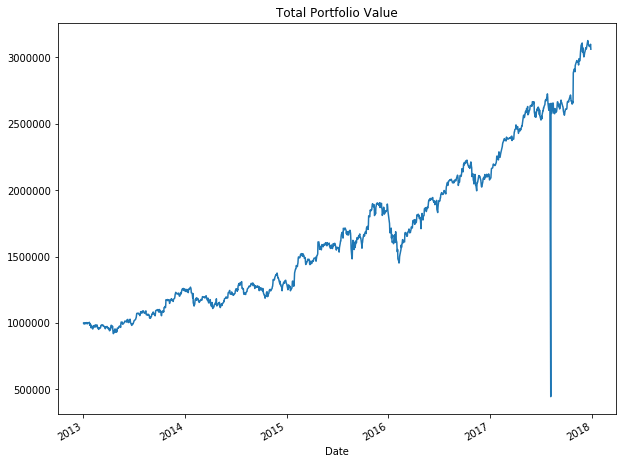

In [16]:
portfolio["Final Pos"].plot(figsize=(10,8))
plt.title("Total Portfolio Value")

In [17]:
portfolio[portfolio["Final Pos"] < 800000]

,Apple Pos,Cisco Pos,IBM Pos,Amazon Pos,Final Pos
Date,,,,,
2017-08-07,NaN,361749.153983,83230.557839,NaN,444979.711821


In [18]:
portfolio.loc["2017-08-07"]["Apple Pos"]=(portfolio.loc["2017-09-07"]["Apple Pos"]+portfolio.loc["2017-07-07"]["Apple Pos"])/2
portfolio.loc["2017-08-07"]["Amazon Pos"]=(portfolio.loc["2017-09-07"]["Amazon Pos"]+portfolio.loc["2017-07-07"]["Amazon Pos"])/2

In [19]:
portfolio=portfolio.drop("Final Pos",axis=1)
portfolio["Final Pos"]=portfolio.sum(axis=1)

In [20]:
portfolio.head()

,Apple Pos,Cisco Pos,IBM Pos,Amazon Pos,Final Pos
Date,,,,,
2013-01-02,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06
2013-01-03,296211.081362,201081.612586,99449.961803,401818.817768,9.985615e+05
2013-01-04,287962.406426,201395.280236,98798.064680,402860.362986,9.910161e+05
2013-01-07,286268.509917,199511.307768,98365.164248,417331.934243,1.001477e+06
2013-01-08,287038.959620,199705.014749,98227.654698,414099.724068,9.990714e+05


Text(0.5, 1.0, 'Total Portfolio Value')

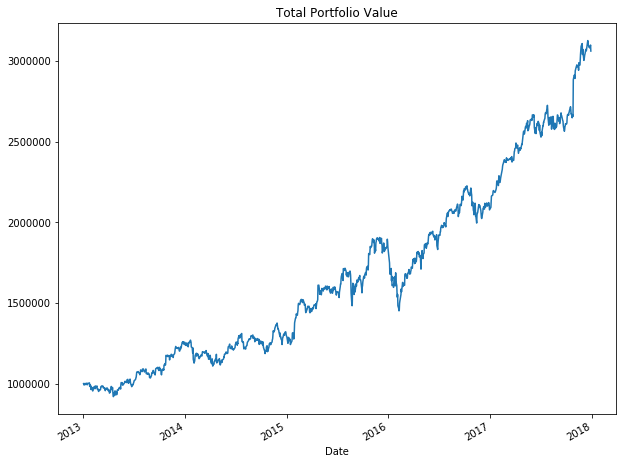

In [21]:
portfolio["Final Pos"].plot(figsize=(10,8))
plt.title("Total Portfolio Value")

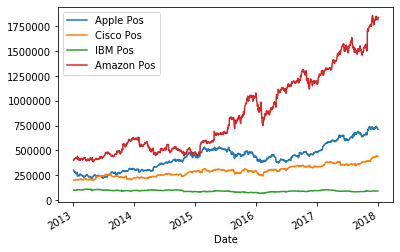

In [22]:
portfolio.drop("Final Pos",axis=1).plot(kind="line")

In [23]:
import numpy as np
test=pd.concat([aapl["Adj. Close"],cisco["Adj. Close"],ibm["Adj. Close"],amzn["Adj. Close"]],axis=1)

In [24]:
test.columns=["Apple Close", "Cisco Close", "IBM Close", "Amazon Close"]

In [25]:
test.loc["2017-08-07"]["Apple Close"]=(test.loc["2017-09-07"]["Apple Close"]+test.loc["2017-07-07"]["Apple Close"])/2
test.loc["2017-08-07"]["Amazon Close"]=(test.loc["2017-09-07"]["Amazon Close"]+test.loc["2017-07-07"]["Amazon Close"])/2

In [26]:
test.head()

,Apple Close,Cisco Close,IBM Close,Amazon Close
Date,,,,
2013-01-02,71.195748,17.452010,168.890592,257.3100
2013-01-03,70.296565,17.546392,167.961630,258.4800
2013-01-04,68.338996,17.573762,166.860637,259.1500
2013-01-07,67.937002,17.409367,166.129509,268.4592
2013-01-08,68.119845,17.426270,165.897268,266.3800


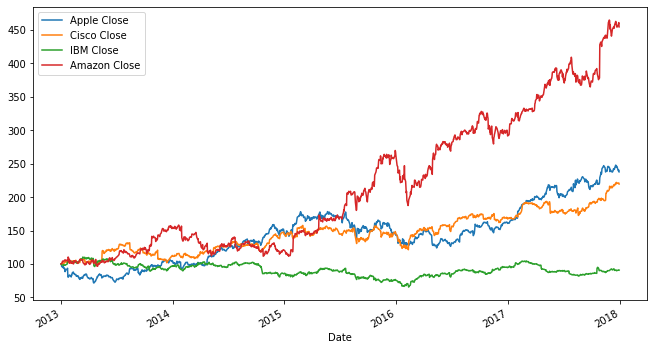

In [27]:
(test/test.iloc[0]*100).plot(figsize=(11,6))

In [28]:
log_returns=np.log(test/test.shift(1))

In [29]:
log_returns.head()

,Apple Close,Cisco Close,IBM Close,Amazon Close
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.012710,0.005393,-0.005516,0.004537
2013-01-04,-0.028242,0.001559,-0.006577,0.002589
2013-01-07,-0.005900,-0.009399,-0.004391,0.035292
2013-01-08,0.002688,0.000970,-0.001399,-0.007775


### Now, we will calculate:
- Mean
- Covariance
- Correlation Matirce

In [30]:
l_mean=log_returns.mean()  
l_cov=log_returns.cov() 

In [31]:
l_coor=log_returns.corr()

In [32]:
weights= np.random.random(4)
weights/=np.sum(weights)
weights

array([0.34079865, 0.16977217, 0.30845507, 0.18097411])

In [33]:
#Expected return in one day, or we can multiply by 250 to see in one year
np.sum(weights*l_mean) *250

0.13382610353961186

In [34]:
#Expected variance in one year
np.dot(weights.T, np.dot(l_cov,weights)) *250 

0.024027442425032033

In [35]:
#Expected volatility in one year
np.sqrt(np.dot(weights.T,np.dot(l_cov,weights))*250) 

0.15500787859019308

# Now lets simulate 10.000 possible combinations of this 4 assets in diferent proportions, and then plot the return and the volatility.

In [36]:
test_return=[]
test_vol=[]
for x in range(10000):
    weights= np.random.random(4)
    weights/=np.sum(weights)
    weights
    
    test_return.append(np.sum(weights*l_mean) *250)
    test_vol.append(np.sqrt(np.dot(weights.T,np.dot(l_cov,weights))*250))

In [37]:
returns=np.array(test_return)
volatilities=np.array(test_vol)
test_port=pd.DataFrame({"Return":returns,"Volatility":volatilities})

In [38]:
test_port.head()

,Return,Volatility
0,0.203103,0.177906
1,0.201821,0.174465
2,0.157151,0.165475
3,0.148583,0.154892
4,0.150703,0.157141


In [39]:
test_port["Ratio"]=test_port["Return"]/test_port["Volatility"]

In [42]:
max(test_port["Ratio"])

1.2072886969651464

Text(0, 0.5, 'Expected Return')

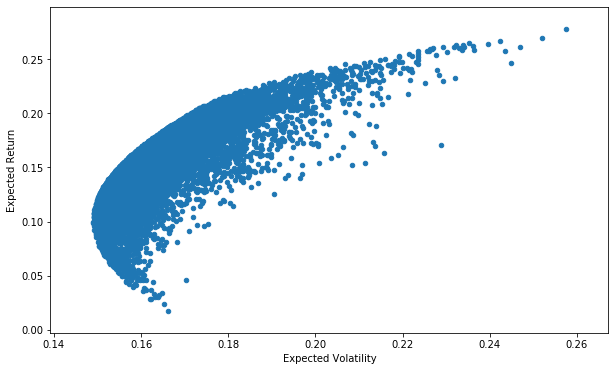

In [40]:
test_port.plot(x="Volatility", y="Return", kind="scatter", figsize=(10,6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")